```
Student Name: Suraj Kanwar
Student ID: 2357572
```

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib

In [3]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pathlib import Path

# Define dataset directory
dataset_dir = Path('/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Fruit Classification')

# Initialize variables to track the total image count and class distribution
total_images = 0
category_counts = {}

# Loop through the subdirectories in the 'Train' folder
for category in os.listdir(dataset_dir / 'Train'):
    category_path = dataset_dir / 'Train' / category
    if os.path.isdir(category_path):
        num_images_in_category = len([f for f in os.listdir(category_path) if os.path.isfile(category_path / f)])
        total_images += num_images_in_category
        category_counts[category] = num_images_in_category

# Print dataset summary
print(f"Total images found: {total_images}")
print(f"Total categories: {len(category_counts)}")
print("Image count by category:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

Total images found: 6242
Total categories: 5
Image count by category:
Grape: 1468
Peach: 1222
Banana: 1422
Cherry: 1222
Mango: 908


<ipython-input-4-183bc3e872de>:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


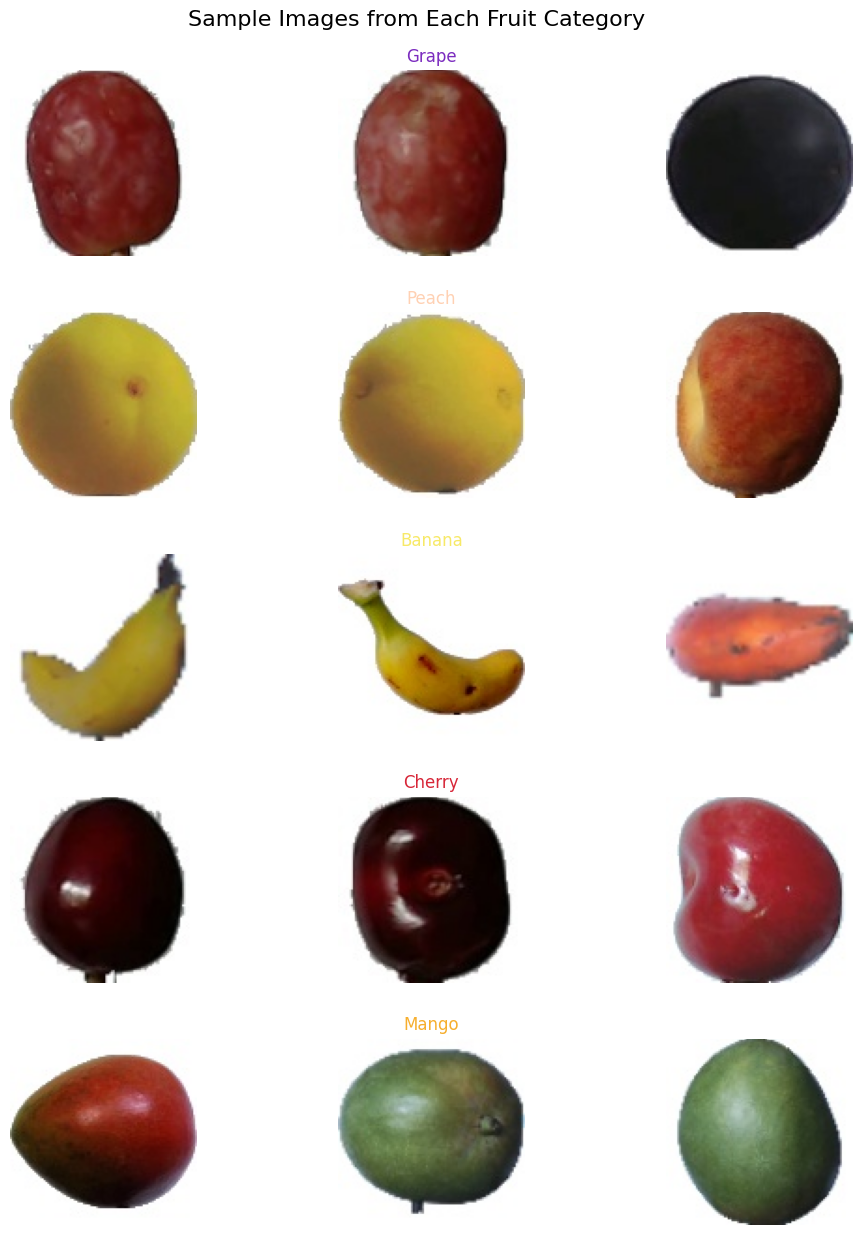

In [4]:
import matplotlib.gridspec as gridspec
from matplotlib import cm

# Define the color map for each fruit category
fruit_colors = {
    'Banana': '#f7e967',
    'Mango': '#f6ae2d',
    'Peach': '#ffd1b3',
    'Grape': '#7b2cbf',
    'Cherry': '#d72638'
}

sampled_images = {}
for category in category_counts:
    category_path = dataset_dir / 'Train' / category
    image_files = [f for f in os.listdir(category_path) if os.path.isfile(category_path / f)]
    sampled_images[category] = random.sample(image_files, min(3, len(image_files)))

# Set up the grid layout for image display
num_categories = len(sampled_images)
fig = plt.figure(figsize=(12, num_categories * 3))
gs = gridspec.GridSpec(num_categories, 3, figure=fig, hspace=0.3)

for i, (category, images) in enumerate(sampled_images.items()):
    for j, image_file in enumerate(images):
        ax = fig.add_subplot(gs[i, j])
        img_path = dataset_dir / 'Train' / category / image_file
        img = plt.imread(img_path)
        ax.imshow(img)
        ax.axis('off')
        if j == 1:
            ax.set_title(category, fontsize=12, color=fruit_colors.get(category, 'black'))

plt.suptitle("Sample Images from Each Fruit Category", fontsize=16, y=0.92)
plt.tight_layout()
plt.show()

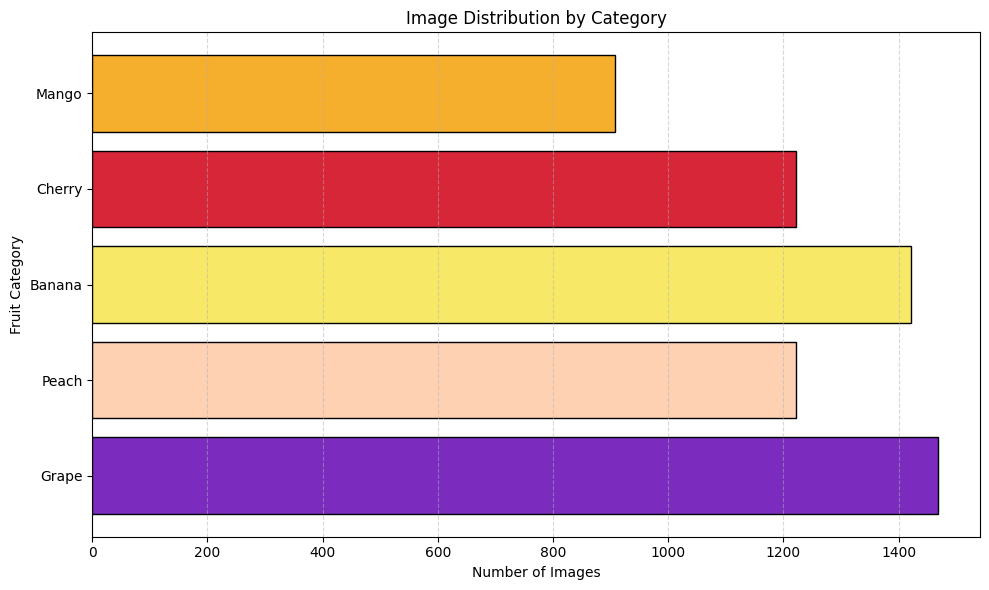

In [5]:
# Visualization 2: Bar Chart
plt.figure(figsize=(10, 6))
categories = list(category_counts.keys())
counts = list(category_counts.values())
bar_colors = [fruit_colors.get(cat, 'lightgray') for cat in categories]

plt.barh(categories, counts, color=bar_colors, edgecolor='black')
plt.xlabel("Number of Images")
plt.ylabel("Fruit Category")
plt.title("Image Distribution by Category")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


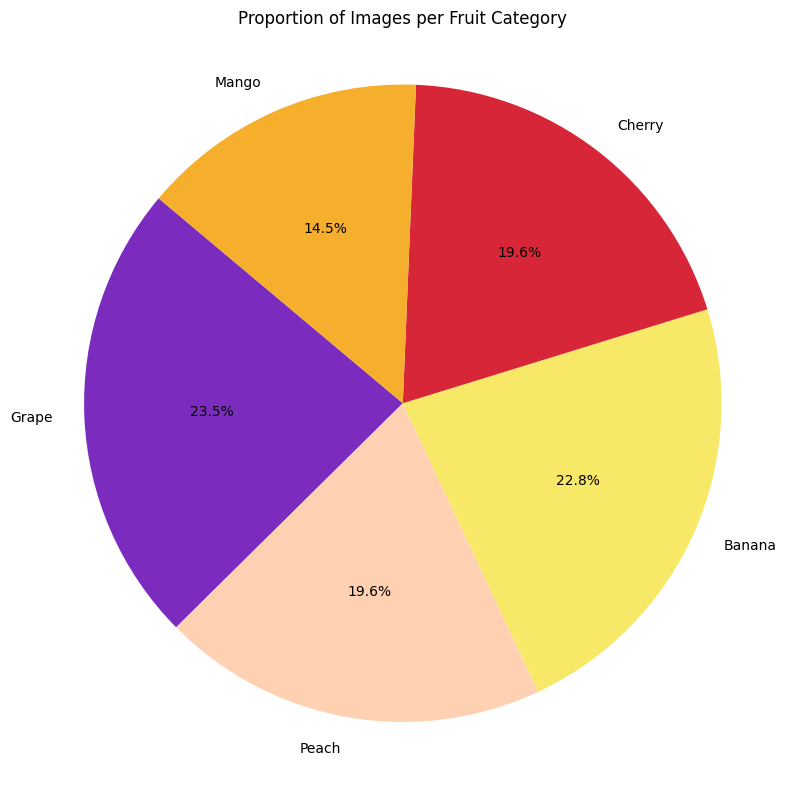

In [6]:
# Visualization 3: Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=categories,
    colors=bar_colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10}
)
plt.title("Proportion of Images per Fruit Category")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


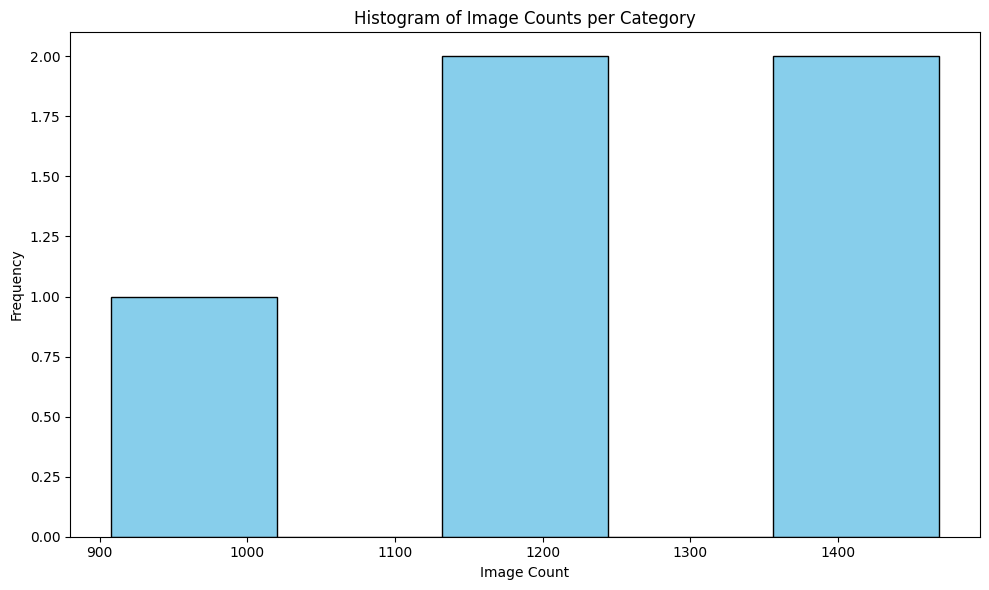

In [7]:
# prompt: create a histogram

# Assuming you want to create a histogram of the image sizes.
# You would need to read the images and get their dimensions.
# Since this is computationally expensive and the previous code doesn't do this,
# we will create a placeholder histogram using the category counts as an example.

plt.figure(figsize=(10, 6))
plt.hist(list(category_counts.values()), bins=len(category_counts), color='skyblue', edgecolor='black')
plt.xlabel("Image Count")
plt.ylabel("Frequency")
plt.title("Histogram of Image Counts per Category")
plt.tight_layout()
plt.show()

# To create a histogram of actual image sizes, you would need to add code
# to open each image file (e.g., using PIL or OpenCV) and get its width and height.
# Example (requires Pillow library):
# from PIL import Image
# image_sizes = []
# for category in os.listdir(dataset_dir / 'Train'):
#     category_path = dataset_dir / 'Train' / category
#     if os.path.isdir(category_path):
#         for image_file in os.listdir(category_path):
#             if os.path.isfile(category_path / image_file):
#                 try:
#                     img = Image.open(category_path / image_file)
#                     image_sizes.append(img.size) # size is a tuple (width, height)
#                     img.close()
#                 except:
#                     print(f"Could not open image: {category_path / image_file}")
#
# if image_sizes:
#     widths = [size[0] for size in image_sizes]
#     heights = [size[1] for size in image_sizes]
#
#     plt.figure(figsize=(12, 5))
#
#     plt.subplot(1, 2, 1)
#     plt.hist(widths, bins=50, color='lightblue', edgecolor='black')
#     plt.xlabel("Image Width")
#     plt.ylabel("Frequency")
#     plt.title("Histogram of Image Widths")
#
#     plt.subplot(1, 2, 2)
#     plt.hist(heights, bins=50, color='lightgreen', edgecolor='black')
#     plt.xlabel("Image Height")
#     plt.ylabel("Frequency")
#     plt.title("Histogram of Image Heights")
#
#     plt.tight_layout()
#     plt.show()
# else:
#     print("No image sizes were collected.")

In [8]:
from PIL import Image
from pathlib import Path

def find_and_clean_corrupt_images(base_dir: Path) -> list:
    corrupt_images = []

    for image_path in base_dir.rglob("*.*"):
        if image_path.is_file():
            try:
                with Image.open(image_path) as img:
                    img.verify()
            except Exception:
                corrupt_images.append(image_path)

    for bad_img in corrupt_images:
        try:
            bad_img.unlink()
            print(f"Removed corrupted file: {bad_img}")
        except FileNotFoundError:
            print(f"File not found while deleting: {bad_img}")
        except Exception as err:
            print(f"Error deleting {bad_img}: {err}")

    return corrupt_images

# Define dataset paths
train_path = Path('/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Fruit Classification/Train')
test_path = Path('/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Fruit Classification/Test')

corrupted_train = find_and_clean_corrupt_images(train_path)

corrupted_test = find_and_clean_corrupt_images(test_path)

print(f"Corrupted images removed from Train: {len(corrupted_train)}")
print(f"Corrupted images removed from Test: {len(corrupted_test)}")


Corrupted images removed from Train: 0
Corrupted images removed from Test: 0


In [9]:
# Set up image data generators with augmentation for training and rescaling for validation.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (100, 100)
batch = 32
validation_ratio = 0.2
dataset_path = '/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Fruit Classification/Train'

augmentor = ImageDataGenerator(
    rescale=1./255,
    validation_split=validation_ratio,
    rotation_range=25,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='reflect'
)

# Simple rescaling for validation
no_aug = ImageDataGenerator(
    rescale=1./255,
    validation_split=validation_ratio
)

# Training images with augmentation
train_loader = augmentor.flow_from_directory(
    directory=dataset_path,
    target_size=image_size,
    batch_size=batch,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

# Validation images without augmentation
val_loader = no_aug.flow_from_directory(
    directory=dataset_path,
    target_size=image_size,
    batch_size=batch,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print(f"Classes detected: {train_loader.class_indices}")
print(f"Training batches per epoch: {len(train_loader)}")
print(f"Validation batches per epoch: {len(val_loader)}")


Found 4996 images belonging to 5 classes.
Found 1246 images belonging to 5 classes.
Classes detected: {'Banana': 0, 'Cherry': 1, 'Grape': 2, 'Mango': 3, 'Peach': 4}
Training batches per epoch: 157
Validation batches per epoch: 39


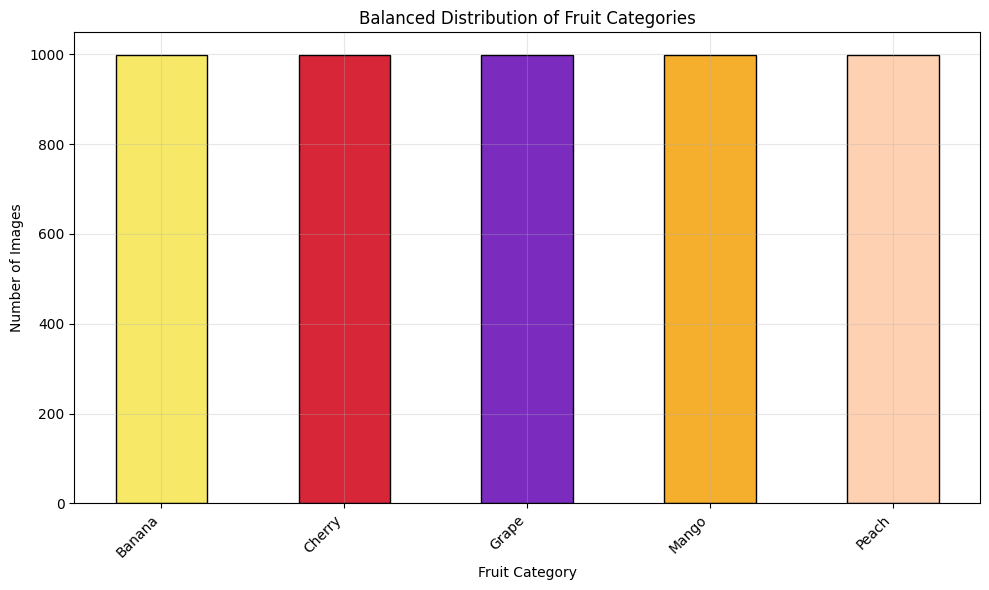

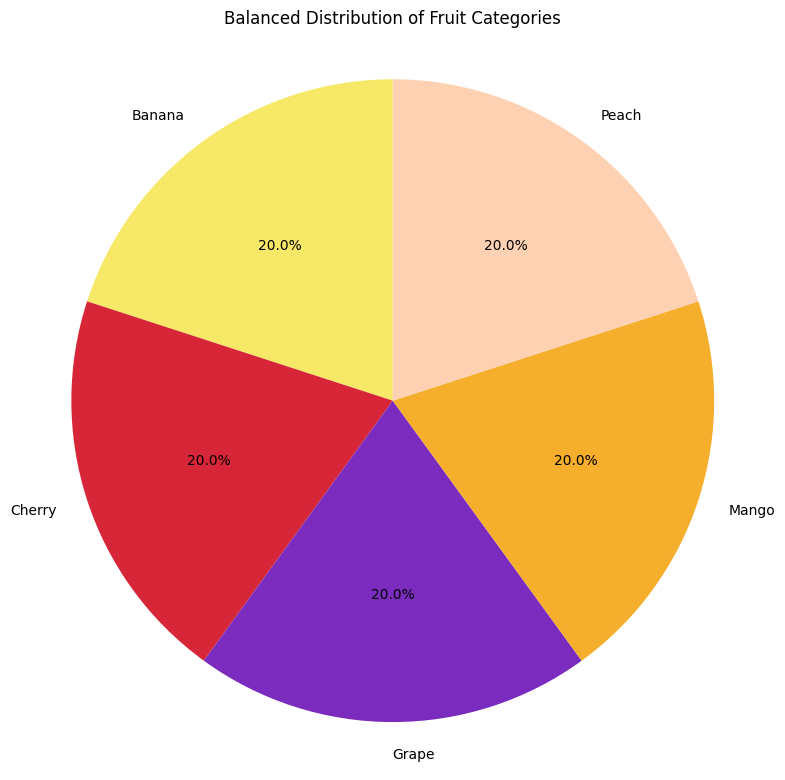

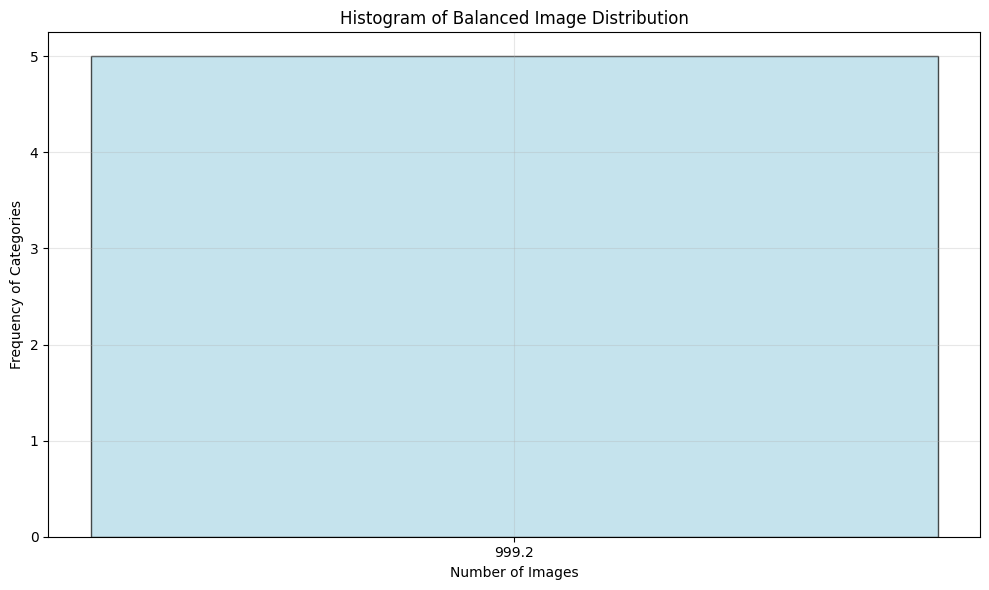

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset parameters
total_training_images = 4996
num_classes = 5
classes = ['Banana', 'Cherry', 'Grape', 'Mango', 'Peach']

# Ideal balanced counts
balanced_counts = [total_training_images / num_classes] * num_classes  # Approximately 999.2 per class

# Bar Chart
plt.figure(figsize=(10, 6))
bar_width = 0.5
index = np.arange(len(classes))

plt.bar(index, balanced_counts, bar_width, color=['#f7e967', '#d72638', '#7b2cbf', '#f6ae2d', '#ffd1b3'], edgecolor='black')

plt.xlabel('Fruit Category')
plt.ylabel('Number of Images')
plt.title('Balanced Distribution of Fruit Categories')
plt.xticks(index, classes, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(balanced_counts, labels=classes, colors=['#f7e967', '#d72638', '#7b2cbf', '#f6ae2d', '#ffd1b3'], autopct='%1.1f%%', startangle=90)
plt.title('Balanced Distribution of Fruit Categories')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(balanced_counts, bins=1, color='#ADD8E6', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Images')
plt.ylabel('Frequency of Categories')
plt.title('Histogram of Balanced Image Distribution')
plt.xticks([balanced_counts[0]])  # Single bin for balanced count
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [11]:
from tensorflow.keras import models, layers, optimizers, callbacks

# Building a CNN with 3 convolution layers followed by dense layers for image classification.
def build_cnn(input_dims, output_classes):
    cnn = models.Sequential()

    # Convolutional Block 1
    cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_dims))
    cnn.add(layers.MaxPooling2D(2, 2))

    # Convolutional Block 2
    cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
    cnn.add(layers.MaxPooling2D(2, 2))

    # Convolutional Block 3
    cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))
    cnn.add(layers.MaxPooling2D(2, 2))

    # Transition to Fully Connected Layers
    cnn.add(layers.Flatten())
    cnn.add(layers.Dense(128, activation='relu'))
    cnn.add(layers.Dense(64, activation='relu'))
    cnn.add(layers.Dense(32, activation='relu'))

    cnn.add(layers.Dense(output_classes, activation='softmax'))

    return cnn

input_shape = (100, 100, 3)
num_labels = train_loader.num_classes
model_cnn = build_cnn(input_shape, num_labels)

model_cnn.compile(
    optimizer=optimizers.SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_cnn.summary()

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

train_logs = model_cnn.fit(
    train_loader,
    validation_data=val_loader,
    epochs=15,
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,742,277 (6.65 MB)

 Trainable params: 1,742,277 (6.65 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 232ms/step - accuracy: 0.3996 - loss: 1.4617 - val_accuracy: 0.5578 - val_loss: 1.0655
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 202ms/step - accuracy: 0.6851 - loss: 0.7847 - val_accuracy: 0.6236 - val_loss: 0.7475
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 198ms/step - accuracy: 0.8110 - loss: 0.4913 - val_accuracy: 0.6100 - val_loss: 1.3120
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 212ms/step - accuracy: 0.8861 - loss: 0.3459 - val_accuracy: 1.0000 - val_loss: 0.1315
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.9366 - loss: 0.2011 - val_accuracy: 0.9799 - val_loss: 0.0849
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 208ms/step - accuracy: 0.9539 - loss: 0.1646 - val_accuracy: 0.9807 - val_loss: 0.0830
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 209ms/step - accuracy: 0.9794 - loss: 0.0864 - val_accuracy: 0.9944 - val_loss: 0.0262
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 208ms/step - accuracy: 0.9838 - loss: 0

In [12]:
# Saving and load the trained model along with its label mapping for later use.

from tensorflow.keras.models import load_model
import json


model_output_path = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Fruit Classification/fruit_classifier_model.keras"
model_cnn.save(model_output_path)


label_dictionary = train_loader.class_indices

# Save the label mapping as a JSON file
label_mapping_path = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Fruit Classification/label_mapping.json"
with open(label_mapping_path, "w") as json_file:
    json.dump(label_dictionary, json_file)

print("Model and label mapping saved successfully!")

# Load the saved model from Google Drive
restored_model = load_model(model_output_path)

# You can also reload the label mapping if needed
with open(label_mapping_path, "r") as json_file:
    restored_label_mapping = json.load(json_file)

print("Model and label mapping loaded successfully!")

# Optionally: Verify by printing out the class indices
print("Restored label mapping:", restored_label_mapping)

# If you want to map back to the class names, reverse the label mapping
index_to_class = {v: k for k, v in restored_label_mapping.items()}

# Print out the class names based on index
print("Class names:", [index_to_class[i] for i in range(len(index_to_class))])


Model and label mapping saved successfully!
Model and label mapping loaded successfully!
Restored label mapping: {'Banana': 0, 'Cherry': 1, 'Grape': 2, 'Mango': 3, 'Peach': 4}
Class names: ['Banana', 'Cherry', 'Grape', 'Mango', 'Peach']


In [13]:
from sklearn.metrics import classification_report, confusion_matrix


# Generate predictions from validation set
predictions = restored_model.predict(val_loader)
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = val_loader.classes
label_names = list(restored_label_mapping.keys())

# Display classification metrics
print("\nEvaluation Summary:\n")
print(classification_report(actual_labels, predicted_labels, target_names=label_names))

# Display confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)
print("\nConfusion Matrix:\n", conf_matrix)


39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step

Evaluation Summary:

              precision    recall  f1-score   support

      Banana       1.00      1.00      1.00       284
      Cherry       1.00      0.97      0.99       244
       Grape       1.00      1.00      1.00       293
       Mango       0.96      1.00      0.98       181
       Peach       1.00      1.00      1.00       244

    accuracy                           0.99      1246
   macro avg       0.99      0.99      0.99      1246
weighted avg       0.99      0.99      0.99      1246


Confusion Matrix:
 [[284   0   0   0   0]
 [  0 237   0   7   0]
 [  0   0 293   0   0]
 [  0   0   0 181   0]
 [  0   0   0   0 244]]


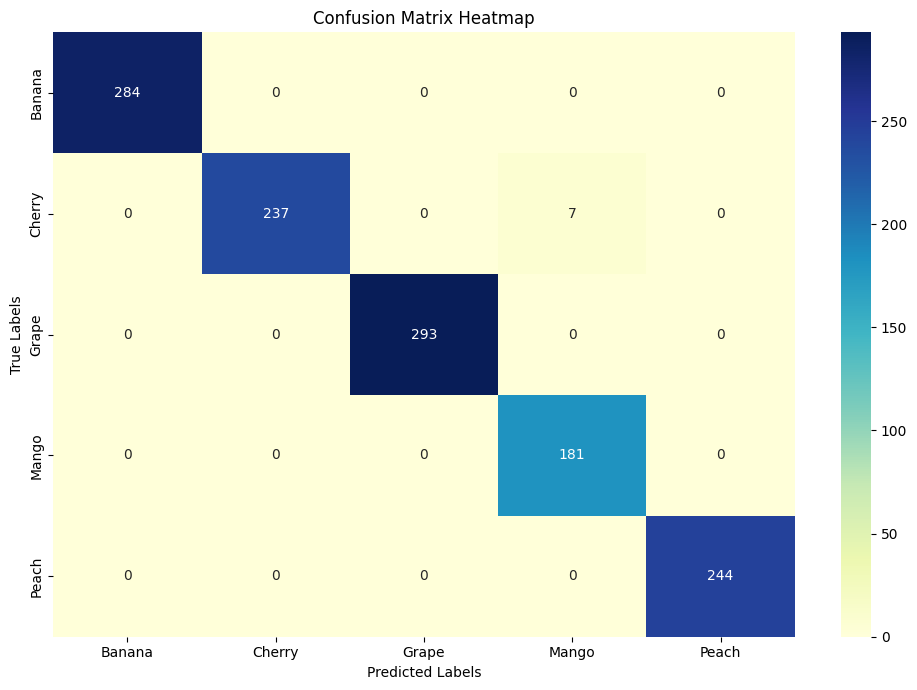

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sb


actual = actual_labels
predicted = predicted_labels

# Create confusion matrix
matrix = confusion_matrix(actual, predicted, labels=list(restored_label_mapping.values()))

# Plot heatmap
plt.figure(figsize=(10, 7))
sb.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu',
           xticklabels=restored_label_mapping.keys(),
           yticklabels=restored_label_mapping.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


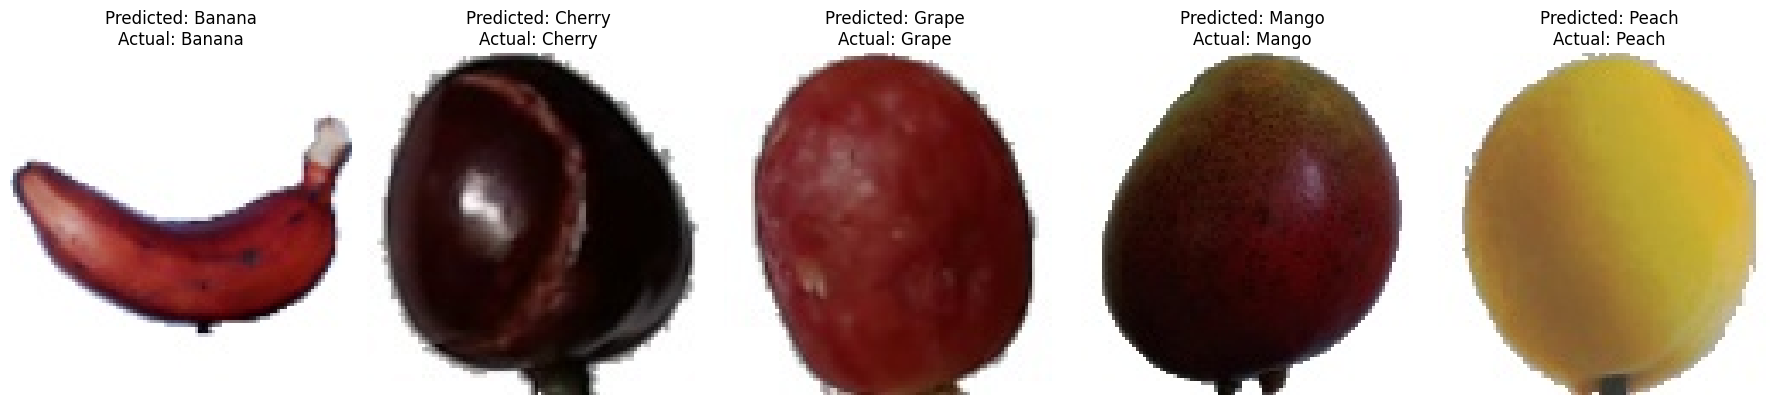

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# The val_loader was already created earlier in the notebook using the validation_split
# from the training data. We should reuse that instead of creating a new generator
# pointing to a potentially non-existent 'Validation' directory.

# Retrieve the label mapping from the restored model
label_mapping = restored_label_mapping # Assuming restored_label_mapping is available from previous cells
reverse_label_map = {v: k for k, v in label_mapping.items()}
category_count = {i: 0 for i in range(len(label_mapping))}

# Initialize lists to hold images and their corresponding labels
selected_images = []
selected_labels = []

# Collect one image per class from the validation data using the existing val_loader
# Reset the generator to ensure we start from the beginning of the validation data
val_loader.reset()

for batch_images, batch_labels in val_loader:
    for img, label in zip(batch_images, batch_labels):
        label_id = np.argmax(label)
        if category_count[label_id] == 0:
            selected_images.append(img)
            selected_labels.append(label_id)
            category_count[label_id] += 1

        # Stop collecting once we have one image for each class
        if sum(category_count.values()) == len(label_mapping):
            break
    # Break the outer loop as well if we have collected all necessary images
    if sum(category_count.values()) == len(label_mapping):
        break

# Convert to numpy array for prediction
selected_images = np.array(selected_images)

# Model predictions
# Assuming 'restored_model' is the model you want to use for prediction
model_predictions = restored_model.predict(selected_images)
predicted_class_ids = np.argmax(model_predictions, axis=1)

# Display results
plt.figure(figsize=(18, 6))
for idx in range(len(selected_images)):
    plt.subplot(1, len(selected_images), idx + 1)
    plt.imshow(selected_images[idx])
    plt.title(f"Predicted: {reverse_label_map[predicted_class_ids[idx]]}\nActual: {reverse_label_map[selected_labels[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:
# Defining and summarize a deeper CNN model with multiple convolutional layers, batch normalization, and dropout for classification.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# Define deeper model with modified naming
complex_model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),


    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),


    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),


    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output layer (adjust num_classes based on your dataset)
    Dense(5, activation='softmax')
])



# Display the model summary
complex_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 98, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 96, 96, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 96, 96, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 44, 44, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 44, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,654,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,976,805 (11.36 MB)

 Trainable params: 2,975,909 (11.35 MB)

 Non-trainable params: 896 (3.50 KB)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for data augmentation
# Use validation_split here to create both train and validation sets from the same directory
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 # Specify the validation split ratio
)

# No need for a separate val_datagen if using validation_split

# Training generator
train_generator = train_datagen.flow_from_directory(
    # Point to the main training data directory
    '/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Fruit Classification/Train',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training' # Specify 'training' subset
)

# Validation generator - use the same ImageDataGenerator but specify the 'validation' subset
val_generator = train_datagen.flow_from_directory(
    # Point to the same main training data directory
    '/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Fruit Classification/Train',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation' # Specify 'validation' subset
)

Found 4996 images belonging to 5 classes.
Found 1246 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 291ms/step - accuracy: 0.7006 - loss: 1.7182 - val_accuracy: 0.1453 - val_loss: 27.8931
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 250ms/step - accuracy: 0.9027 - loss: 0.5624 - val_accuracy: 0.5851 - val_loss: 2.1861
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 252ms/step - accuracy: 0.9238 - loss: 0.4681 - val_accuracy: 0.8459 - val_loss: 0.4693
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 234ms/step - accuracy: 0.9221 - loss: 0.3974 - val_accuracy: 0.9125 - val_loss: 0.3886
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 237ms/step - accuracy: 0.9537 - loss: 0.2138 - val_accuracy: 0.9615 - val_loss: 0.1323
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 253ms/step - accuracy: 0.9638 - loss: 0.1687 - val_accuracy: 0.9310 - val_loss: 0.1968
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 255ms/step - accuracy: 0.9563 - loss: 0.1944 - val_accuracy: 0.9093 - val_loss: 0.6386
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 250ms/step - accuracy: 0.9609 - loss: 

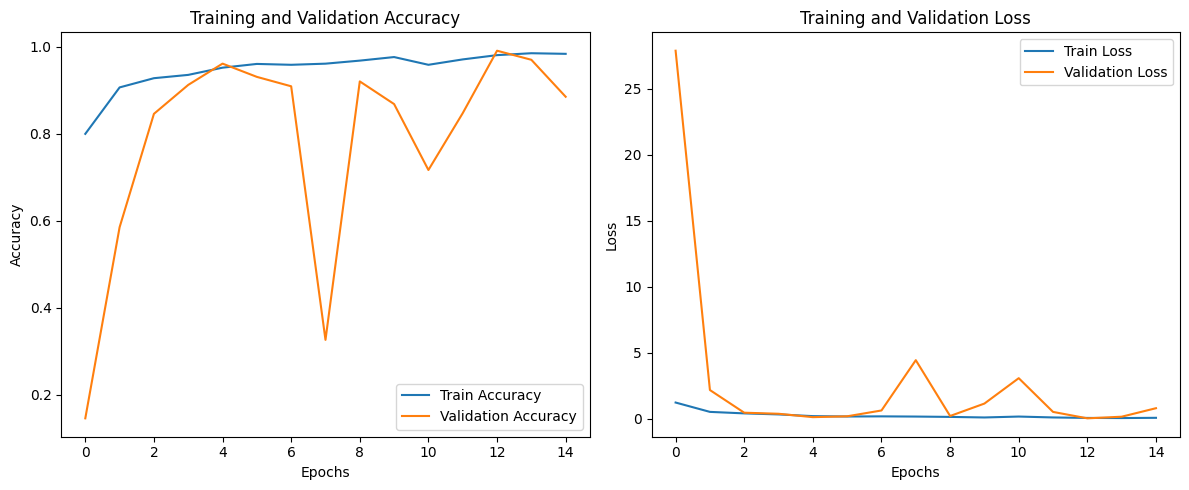

In [18]:
# Train the model

# Add the compile step for the complex_model
complex_model.compile(
    optimizer='adam',  # Or another suitable optimizer like SGD
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_complex_model = complex_model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)


plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_complex_model.history['accuracy'], label='Train Accuracy')
plt.plot(history_complex_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_complex_model.history['loss'], label='Train Loss')
plt.plot(history_complex_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 203ms/step


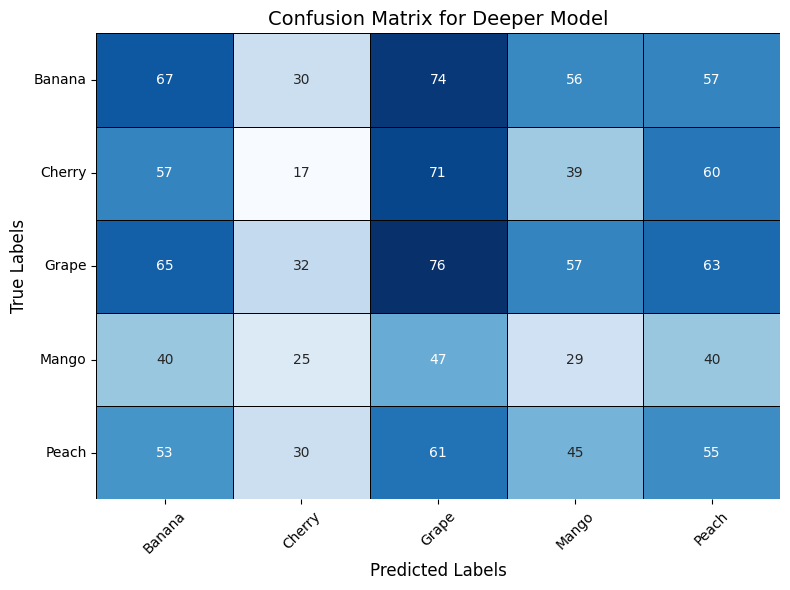

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns # Import seaborn for heatmap plotting
import matplotlib.pyplot as plt # Import matplotlib for plotting
import numpy as np # Import numpy for argmax

# Ensure that val_generator is defined and available from a previous cell.
# val_generator was created in the previous cell using ImageDataGenerator.

# Get the class labels from the generator
class_labels = list(val_generator.class_indices.keys())

# --- Calculate true and predicted labels for the validation set ---
# Reset the generator to ensure we get predictions for all validation samples
val_generator.reset()

# Get the true labels
true_classes = val_generator.classes

# Get the predicted probabilities
val_pred_probs_complex = complex_model.predict(val_generator)

# Convert predicted probabilities to class indices
val_pred_classes_complex = np.argmax(val_pred_probs_complex, axis=1)

# --- End of calculation ---


# Create confusion matrix
cm_complex = confusion_matrix(true_classes, val_pred_classes_complex)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_complex, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels, cbar=False, linewidths=0.5, linecolor='black')

plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix for Deeper Model', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


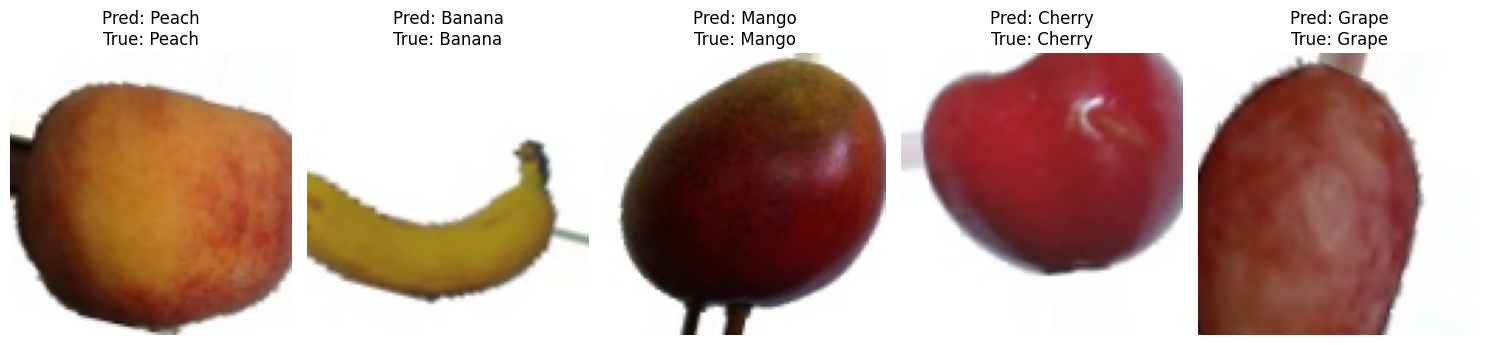

In [20]:
import json


with open('class_indices.json', 'w') as f:
    json.dump(val_generator.class_indices, f)


class_indices = val_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}

# Track one sample per class
class_counts = {i: 0 for i in range(len(class_indices))}
sample_images = []
sample_labels = []


for images, labels in val_generator:
    for img, label in zip(images, labels):
        class_id = np.argmax(label)
        if class_counts[class_id] == 0:
            sample_images.append(img)
            sample_labels.append(class_id)
            class_counts[class_id] += 1

        if sum(class_counts.values()) == len(class_indices):
            break
    if sum(class_counts.values()) == len(class_indices):
        break

sample_images = np.array(sample_images)

# Predict using the reloaded deep model
predictions = model_cnn.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

# Plot predictions vs true labels
plt.figure(figsize=(15, 5))
for i in range(len(sample_images)):
    plt.subplot(1, len(sample_images), i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Pred: {index_to_class[predicted_classes[i]]}\nTrue: {index_to_class[sample_labels[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [21]:
# Train the same model using SGD and Adam to compare their performance

from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import clone_model
import time

# Function to compile and train a model with a given optimizer
def run_training(optimizer, name):

    model_copy = clone_model(model_cnn)
    model_copy.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print(f"\n--- Training using {name} optimizer ---")
    start = time.time()

    history = model_copy.fit(
        train_generator,
        validation_data=val_generator,
        epochs=15,
        verbose=1
    )

    elapsed = time.time() - start
    print(f"Training completed in {elapsed:.2f} seconds using {name}.")

    # Evaluate performance on validation data
    val_loss, val_accuracy = model_copy.evaluate(val_generator)
    print(f"Validation Accuracy ({name}): {val_accuracy:.4f}")
    print(f"Validation Loss ({name}): {val_loss:.4f}")

    return history, val_accuracy, val_loss, elapsed

# Training using SGD optimizer
sgd_opt = SGD(learning_rate=0.01, momentum=0.9)
sgd_hist, sgd_acc, sgd_loss, sgd_duration = run_training(sgd_opt, "SGD")

# Training using Adam optimizer
adam_opt = Adam(learning_rate=0.001)
adam_hist, adam_acc, adam_loss, adam_duration = run_training(adam_opt, "Adam")



--- Training using SGD optimizer ---
Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 248ms/step - accuracy: 0.4836 - loss: 1.1782 - val_accuracy: 0.6613 - val_loss: 0.8177
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 231ms/step - accuracy: 0.8296 - loss: 0.4704 - val_accuracy: 0.7576 - val_loss: 0.6861
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 227ms/step - accuracy: 0.8782 - loss: 0.3448 - val_accuracy: 0.7689 - val_loss: 1.6086
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 229ms/step - accuracy: 0.9182 - loss: 0.2626 - val_accuracy: 0.9687 - val_loss: 0.0896
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 226ms/step - accuracy: 0.9659 - loss: 0.1098 - val_accuracy: 0.9374 - val_loss: 0.1755
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 230ms/step - accuracy: 0.9706 - loss: 0.0968 - val_accuracy: 0.9679 - val_loss: 0.0979
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 257ms/step - accuracy: 0.9693 - loss: 0.0930 - val_accuracy: 0.9454 - val_loss: 0.2160
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 2

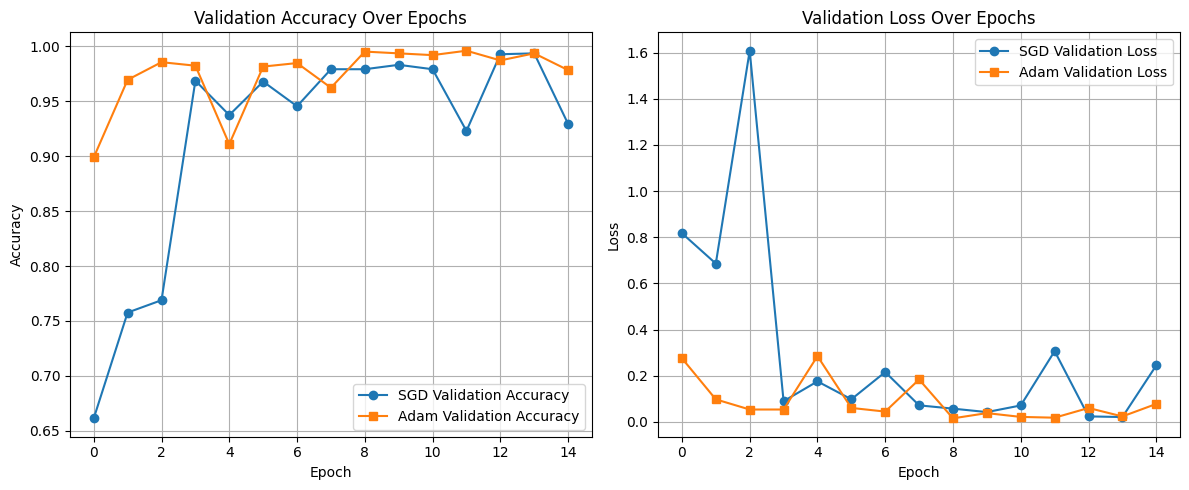

In [22]:


def compare_training_histories(hist_sgd, hist_adam, label_sgd='SGD', label_adam='Adam'):
    plt.figure(figsize=(12, 5))

    # Plot validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(hist_sgd.history['val_accuracy'], marker='o', label=f'{label_sgd} Validation Accuracy')
    plt.plot(hist_adam.history['val_accuracy'], marker='s', label=f'{label_adam} Validation Accuracy')
    plt.title('Validation Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()

    # Plot validation loss
    plt.subplot(1, 2, 2)
    plt.plot(hist_sgd.history['val_loss'], marker='o', label=f'{label_sgd} Validation Loss')
    plt.plot(hist_adam.history['val_loss'], marker='s', label=f'{label_adam} Validation Loss')
    plt.title('Validation Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the comparison function
compare_training_histories(sgd_hist, adam_hist)


In [23]:
# Use transfer learning with VGG16 to train a fruit classifier on custom data


from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# === Configuration ===
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 5
INPUT_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)
DATA_DIR = '/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Fruit Classification/Train'


data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2
)

train_gen = data_gen.flow_from_directory(
    directory=DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = data_gen.flow_from_directory(
    directory=DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


vgg_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=INPUT_SHAPE
)

# Freeze pretrained layers
for layer in vgg_base.layers:
    layer.trainable = False


x = vgg_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(NUM_CLASSES, activation='softmax')(x)


transfer_model = Model(inputs=vgg_base.input, outputs=output_layer)

transfer_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# === Train Model ===
training_history = transfer_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    verbose=1
)


Found 4996 images belonging to 5 classes.
Found 1246 images belonging to 5 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 60s 307ms/step - accuracy: 0.2421 - loss: 1.7797 - val_accuracy: 0.5562 - val_loss: 1.3740
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 204ms/step - accuracy: 0.5089 - loss: 1.3116 - val_accuracy: 0.7191 - val_loss: 1.1763
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 206ms/step - accuracy: 0.6872 - loss: 1.0619 - val_accuracy: 0.8612 - val_loss: 1.0196
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 206ms/step - accuracy: 0.7808 - loss: 0.8919 - val_accuracy: 0.8652 - val_loss: 0.8982
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 207ms/step - accuracy: 0.8258 - loss: 0.7857 - val_accuracy: 0.8884 - val_loss: 0.7857
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 207ms/step - accuracy: 0.8610 - loss: 0.6781 - val_accuracy: 0.8804 - val_loss: 0.7000
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 229ms/step - accuracy: 0.8814 - loss: 0.5958 - val_accuracy: 0.8973 - val_loss: 0.6214
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 207ms/step - accuracy: 0.8967 - loss: 0

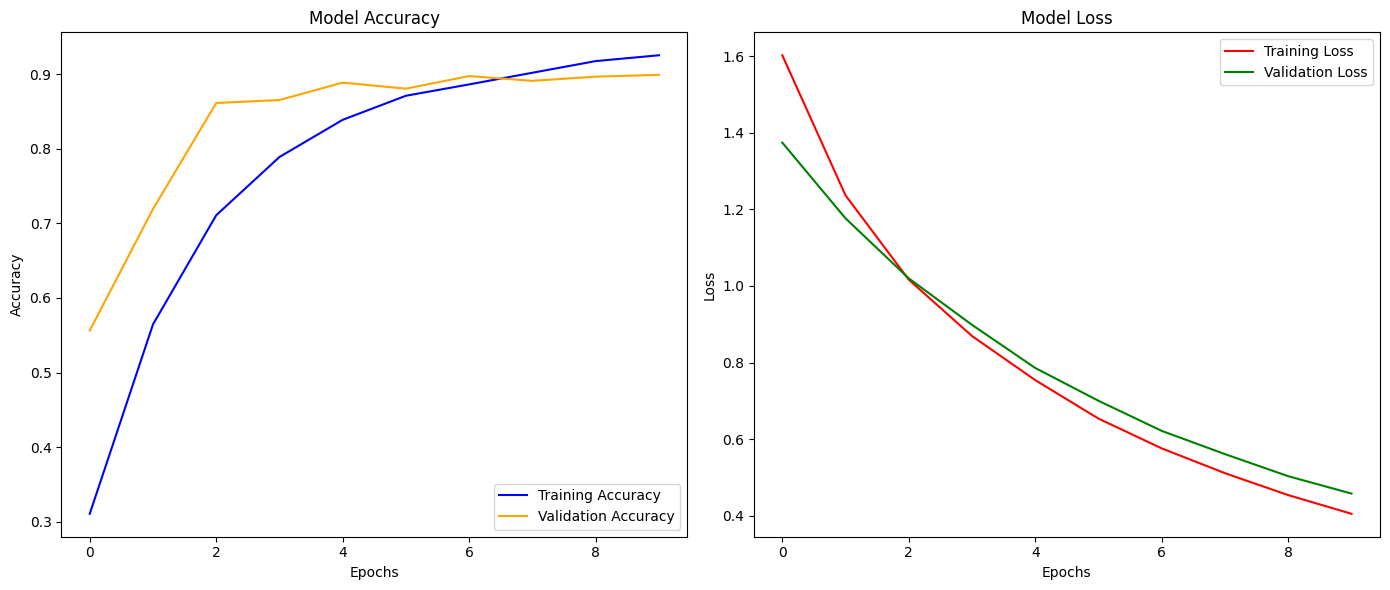

In [24]:

# Plot configuration
fig, (acc_ax, loss_ax) = plt.subplots(1, 2, figsize=(14, 6))


acc_ax.plot(training_history.history['accuracy'], label='Training Accuracy', color='blue')
acc_ax.plot(training_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
acc_ax.set_title('Model Accuracy')
acc_ax.set_xlabel('Epochs')
acc_ax.set_ylabel('Accuracy')
acc_ax.legend(loc='lower right')

loss_ax.plot(training_history.history['loss'], label='Training Loss', color='red')
loss_ax.plot(training_history.history['val_loss'], label='Validation Loss', color='green')
loss_ax.set_title('Model Loss')
loss_ax.set_xlabel('Epochs')
loss_ax.set_ylabel('Loss')
loss_ax.legend(loc='upper right')

# Show plots
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

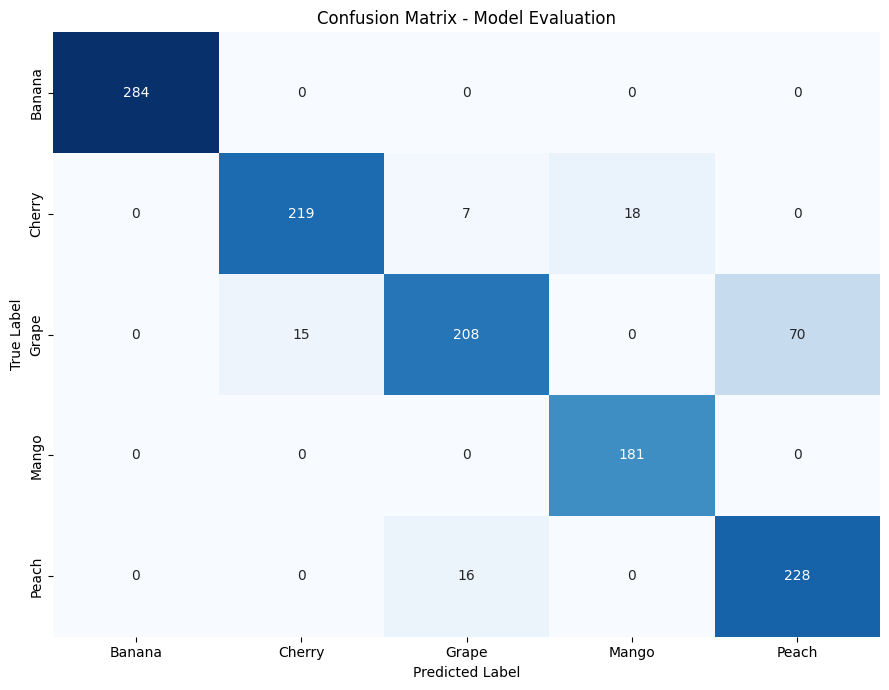

In [27]:
# Initialize lists for true and predicted labels
true_labels = []
predicted_labels = []

# Ensure that val_generator is defined and available from a previous cell.
# val_generator was created in the previous cell using ImageDataGenerator.

# Reset the generator to ensure we get predictions for all validation samples
val_generator.reset()

# Collect true and predicted labels
for batch_images, batch_labels in val_generator:
    # Use the transfer_model for prediction
    predictions = transfer_model.predict(batch_images)

    true_labels.extend(np.argmax(batch_labels, axis=1))
    predicted_labels.extend(np.argmax(predictions, axis=1))

    # Break the loop after processing all samples in the generator
    if len(true_labels) >= val_generator.samples:
        break

true_labels = np.array(true_labels[:val_generator.samples])
predicted_labels = np.array(predicted_labels[:val_generator.samples])

# Classification Report
class_names = list(val_generator.class_indices.keys())
print("\n=== Classification Report ===\n")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Model Evaluation')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


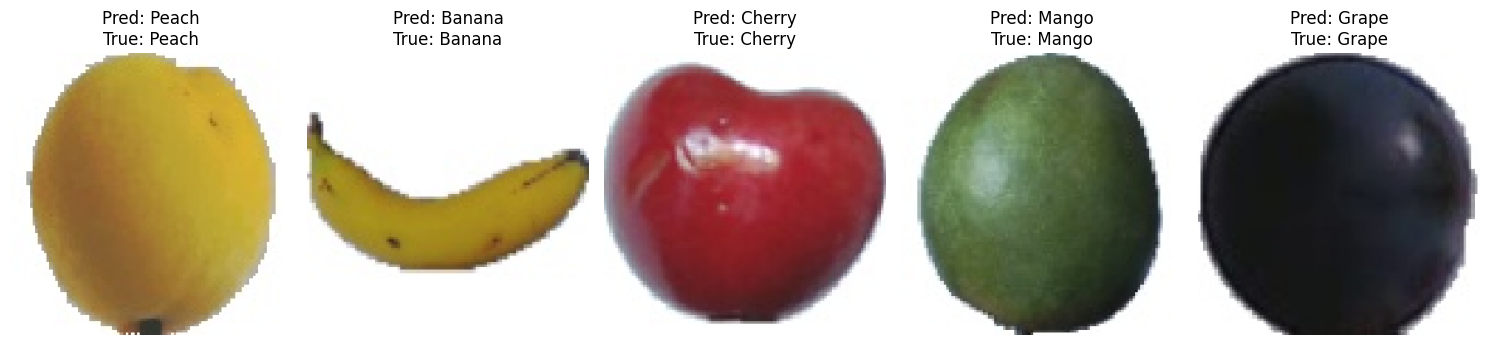

In [30]:
# Mapping class indices to class names
class_mapping = val_generator.class_indices
reverse_class_mapping = {v: k for k, v in class_mapping.items()}
class_image_count = {i: 0 for i in range(len(class_mapping))}

selected_images = []
selected_labels = []

# Iterate through validation data and collect one image per class
for batch_images, batch_labels in val_generator:
    for image, label in zip(batch_images, batch_labels):
        class_index = np.argmax(label)
        if class_image_count[class_index] == 0:
            selected_images.append(image)
            selected_labels.append(class_index)
            class_image_count[class_index] += 1


        if sum(class_image_count.values()) == len(class_mapping):
            break
    if sum(class_image_count.values()) == len(class_mapping):
        break

# Convert to numpy array
selected_images = np.array(selected_images)

# Get predictions using the model
# Use the correct model variable, which is likely transfer_model
model_predictions = transfer_model.predict(selected_images)
predicted_class_indices = np.argmax(model_predictions, axis=1)

# Visualize results
plt.figure(figsize=(15, 5))

for idx in range(len(selected_images)):
    plt.subplot(1, len(selected_images), idx + 1)
    plt.imshow(selected_images[idx])
    predicted_class = reverse_class_mapping[predicted_class_indices[idx]]
    true_class = reverse_class_mapping[selected_labels[idx]]
    plt.title(f"Pred: {predicted_class}\nTrue: {true_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()